# Neurodynamics - Homework 04: Stability in 2-D Dynamical Systems

Group: Katarzyna Olszynska (1000023) & Benjamin Peters (982981)

## Imports

In [ ]:
!pip install brian2

In [ ]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

## Question 1

First, take a look at the competitive Lotka-Volterra model.

$\dot{x} = r_{x}x(1-\frac{x+a_{xy}y}{K_{x}})$

$\dot{y} = r_{y}y(1-\frac{y+a_{yx}x}{K_{y}})$

Think of $x$ as a population of rabbits, and $y$ as a population of sheep $-x,y \ge 0 -$, with respective growth rates $r_{x}$ and $r_{y}$. Individually, each population can grow logistically to a capacity $K_{x}$ and $K_{y}$, but they compete for the same food resources, grass, modelled the terms $a_{xy}y$ and $a_{yx}x$.

Parameters are: $r_{x}=3, r_{y}=2, K_{x}=3, K_{y}=2, a_{xy}=2, a_{yx}=1$.

Give a full phase portrait analysis of the system including:

*   The nullclines of the system.
*   Fixed points of the system.
*   A stability analysis of the fixed points of the system via linearization.

For each, show how you arrived at each answer analytically in the notebook file by using a markdown cell and latex mathematics syntax. Plot the nullclines, indicate fixed points in the plot, and indicate the flow of the vector field. Give an interpretation of the fixed points of the system.

### Solution

We first calculate the nullclines for the rabbit and sheep populations.

**Rabbits:**

$\dot{x} = 3x(1-\frac{x+2y}{3}) = 3x-x^2-2xy = x(3-x-2y)$

Nullclines:

$x = 0 \to y-axis$

$3-x-2y = 0 \Leftrightarrow y = - \frac{x}{2} + \frac{3}{2}$

**Sheep:**

$\dot{y} = 2y(1-\frac{y+x}{2}) = 2y-y^2-xy = y(2-y-x)$

Nullclines:

$y = 0 \to x-axis$

$2-y-x = 0 \Leftrightarrow y = 2-x $

From these nullclines, we can derive the following fixed points:

* $(0,0)$ as the intersection of the $x$- and $y$-axes
* $(0,2)$ as the intersection of $x = 0$ and $y = 2 - x$
* $(3,0)$ as the intersection of $y = 0$ and $y = - \frac{x}{2} + \frac{3}{2}$
* $(1,1)$ as the intersection of $y = 2 - x$ and $y = - \frac{x}{2} + \frac{3}{2}$

Using their Jacobian matrices, we can interpret the stability of these fixed points. The Jacobian for the given system looks as follows:

$J = \begin{pmatrix}
\frac{df}{dx} & \frac{df}{dy} \\
\frac{dg}{dx} & \frac{dg}{dy}
\end{pmatrix} = \begin{pmatrix}
3-2x-2y & -2x \\
-y & 2-2y-x
\end{pmatrix}$

For the individual fixed points, we can derive the following stability characteristics using the traces and determinants of the respective Jacobian matrices:

$J_{(0,0)} = \begin{pmatrix}
3 & 0 \\
0 & 2
\end{pmatrix}$

$tr(J_{(0,0)}) = 5$

$det(J_{(0,0)}) = 6$

Seeing that the eigenvalues 3 and 2 are both positive and that the trace is negative, we can say that $(0,0)$ is an unstable node.

$J_{(0,2)} = \begin{pmatrix}
-1 & 0 \\
-2 & -2
\end{pmatrix}$

$tr(J_{(0,2)}) = -3$

$det(J_{(0,2)}) = 2$

Since the trace is negative and $tr^2 - 4 \cdot det > 0$, we can say that $(0,2)$ is a stable node.

$J_{(3,0)} = \begin{pmatrix}
-3 & -6\\
0 & -1
\end{pmatrix}$

$tr(J_{(3,0)}) = -4$

$det(J_{(3,0)}) = 3$

Since the trace is negative and $tr^2 - 4 \cdot det > 0$, we can say that $(3,0)$ is a stable node.

$J_{(1,1)} = \begin{pmatrix}
-1 & -2 \\
-1 & -1
\end{pmatrix}$

$tr(J_{(1,1)}) = -2$

$det(J_{(1,1)}) = -1$

Since the determinant is negative, we can derive that $(1,1)$ is a saddle point.

In [ ]:
# create a range for x that we want to plot
x_range_1 = np.linspace(0, 5, 100)
# calculate nullclines
rabbit_nc = [-0.5*x + 1.5 for x in x_range_1]
sheep_nc = [2 - x for x in x_range_1]

In [ ]:
# lambda functions to calculate derivatives of x(t) and y(t)
comp_dx = lambda x, y: 3*x - x**2 - 2*x*y
comp_dy = lambda x, y: 2*y - y**2 - x*y
# create a mesh of evenly spaced vectors
xy_1 = np.linspace(0, 5, 15)
x_vals_1, y_vals_1 = np.meshgrid(xy_1, xy_1)
# calculate the vector field for x and y
x_dir_1 = comp_dx(x_vals_1, y_vals_1)
y_dir_1 = comp_dy(x_vals_1, y_vals_1)

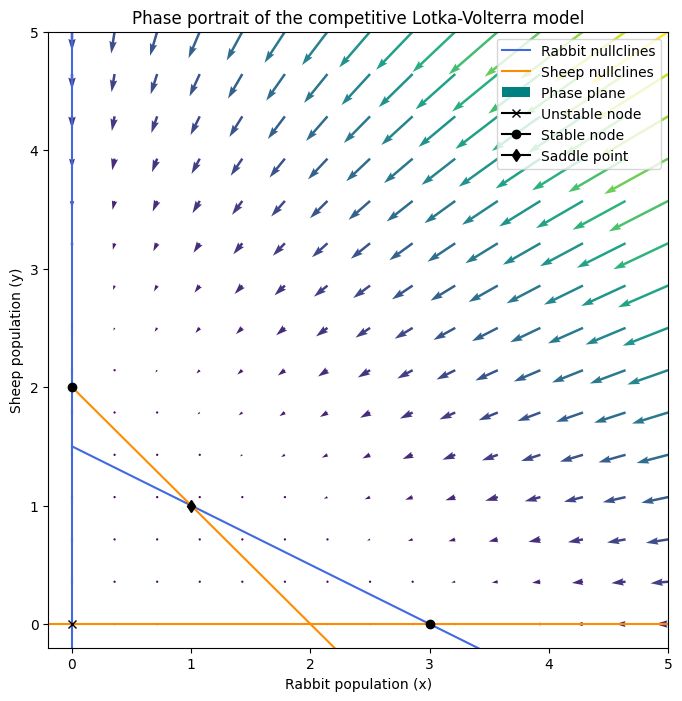

In [ ]:
# plot the phase portrait
fig, ax = plt.subplots(figsize=(8,8))

# plot the rabbit nullclines
ax.plot(x_range_1, rabbit_nc, color="royalblue", label="Rabbit nullclines")
ax.axvline(0, color="royalblue", label="_Rabbit nullclines")
# plot the sheep nullclines
ax.plot(x_range_1, sheep_nc, color="darkorange", label="Sheep nullclines")
ax.axhline(0, color="darkorange", label="_Sheep nullclines")
# plot the phase plane
ax.quiver(x_vals_1, y_vals_1, x_dir_1, y_dir_1, np.sqrt(x_dir_1**2 + y_dir_1**2), color="teal", label="Phase plane")
# plot fixed points
ax.plot(0, 0, color="black", marker="x", label="Unstable node")
ax.plot(0, 2, color="black", marker="o", label="Stable node")
ax.plot(3, 0, color="black", marker="o", label="_Stable node")
ax.plot(1, 1, color="black", marker="d", label="Saddle point")

ax.legend(loc="upper right")
ax.set(title="Phase portrait of the competitive Lotka-Volterra model",
       xlabel="Rabbit population (x)", ylabel="Sheep population (y)",
       xlim=[-0.2,5], ylim=[-0.2,5])

plt.show()

Pick 2 exemplary starting values with different dynamic behavior and simulate the two trajectories. Plot them both in phase space and the solutions for $x$ and $y$ independently as functions of time.

In [ ]:
def sim_comp_lotka_volterra(time_span, x_start, y_start):
  """
  This function describes the simulation of rabbit and sheep populations according to the competitive Lotka-Volterra model.

  Parameters:
  time_span -- denotes the length of the simulation
  x_start -- denotes the initial value of x
  y_start -- denotes the initial value of y

  Returns:
  statemon -- a StateMonitor object tracking the behaviour of x(t) and y(t)
  """
  start_scope()

  # set model parameter values
  r_x = 3
  r_y = 2
  K_x = 3
  K_y = 2
  a_xy = 2
  a_yx = 1

  # define the differential equations for the competitive Lotka-Volterra model
  eqs = """
  dx/dt = r_x*x/ms * (1 - (x + a_xy*y)/K_x) : 1
  dy/dt = r_y*y/ms * (1 - (y + a_yx*x)/K_y) : 1
  """

  # create a NeuronGroup with respective starting values
  neuron = NeuronGroup(1, model=eqs, method="euler")
  neuron.x = x_start
  neuron.y = y_start

  # set up a StateMonitor to track the trajectories of x(t) and y(t)
  statemon = StateMonitor(neuron, ["x", "y"], record=True)

  # create a Network object to manage the simulation
  net = Network(neuron, statemon)
  # run a simulation for given duration
  net.run(time_span)

  return statemon

In [ ]:
# set duration of simulation
duration_1 = 1*second
# starting values for x and y
x1, y1 = (2, 2)
x2, y2 = (0.5, 0.5)
x3, y3 = (4.5, 1.5)
# run the model simulations
statemon_1 = sim_comp_lotka_volterra(duration_1, x1, y1)
statemon_2 = sim_comp_lotka_volterra(duration_1, x2, y2)
statemon_3 = sim_comp_lotka_volterra(duration_1, x3, y3)

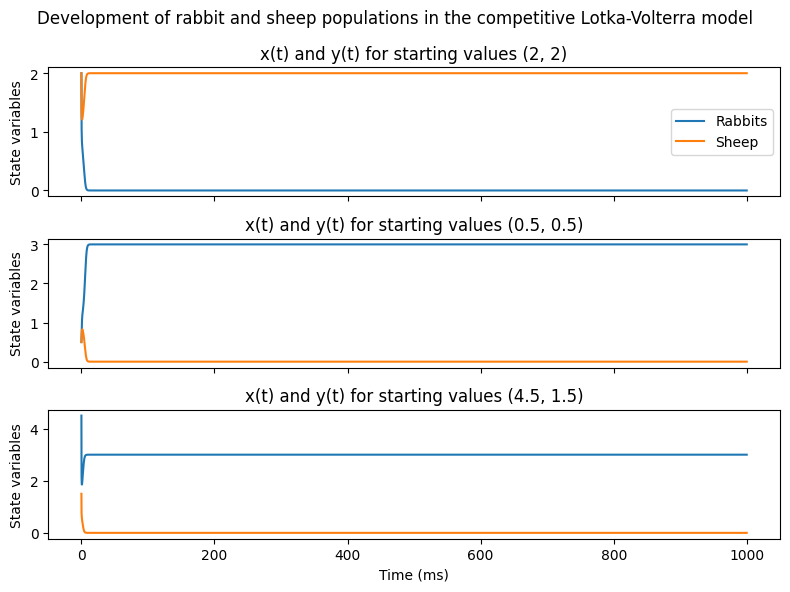

In [ ]:
#plot the results
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(8, 6))

# plot trajectories of x(t) and y(t) for starting values (2, 2)
axes[0].plot(statemon_1.t/ms, statemon_1.x[0], label="Rabbits")
axes[0].plot(statemon_1.t/ms, statemon_1.y[0], label="Sheep")
axes[0].set(ylabel="State variables", title=f"x(t) and y(t) for starting values ({x1}, {y1})")
axes[0].legend(loc="center right")
# plot trajectories of x(t) and y(t) for starting values (0.5, 0.5)
axes[1].plot(statemon_2.t/ms, statemon_2.x[0])
axes[1].plot(statemon_2.t/ms, statemon_2.y[0])
axes[1].set(ylabel="State variables", title=f"x(t) and y(t) for starting values ({x2}, {y2})")
# plot trajectories of x(t) and y(t) for starting values (0.5, 0.5)
axes[2].plot(statemon_3.t/ms, statemon_3.x[0])
axes[2].plot(statemon_3.t/ms, statemon_3.y[0])
axes[2].set(xlabel="Time (ms)", ylabel="State variables", title=f"x(t) and y(t) for starting values ({x3}, {y3})")

# give the plot a proper title
fig.suptitle("Development of rabbit and sheep populations in the competitive Lotka-Volterra model")

fig.tight_layout()

plt.show()

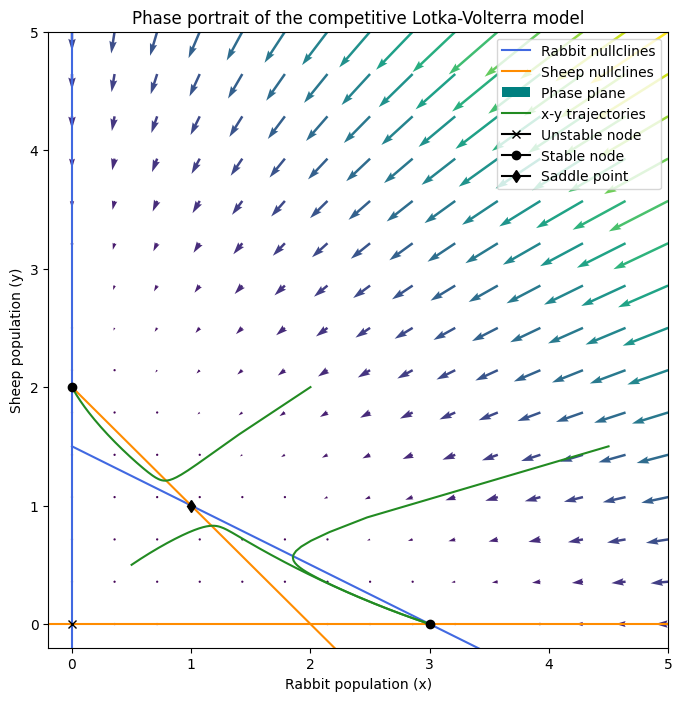

In [ ]:
# plot the phase portrait
fig, ax = plt.subplots(figsize=(8,8))

# plot the rabbit nullclines
ax.plot(x_range_1, rabbit_nc, color="royalblue", label="Rabbit nullclines")
ax.axvline(0, color="royalblue", label="_Rabbit nullclines")
# plot the sheep nullclines
ax.plot(x_range_1, sheep_nc, color="darkorange", label="Sheep nullclines")
ax.axhline(0, color="darkorange", label="_Sheep nullclines")
# plot the phase plane
ax.quiver(x_vals_1, y_vals_1, x_dir_1, y_dir_1, np.sqrt(x_dir_1**2 + y_dir_1**2), color="teal", label="Phase plane")
# add the trajectories of x(t) and y(t) for the given simulations
ax.plot(statemon_1.x[0], statemon_1.y[0], color="forestgreen", label="x-y trajectories")
ax.plot(statemon_2.x[0], statemon_2.y[0], color="forestgreen", label="_x-y trajectories")
ax.plot(statemon_3.x[0], statemon_3.y[0], color="forestgreen", label="_x-y trajectories")
# plot fixed points
ax.plot(0, 0, color="black", marker="x", label="Unstable node")
ax.plot(0, 2, color="black", marker="o", label="Stable node")
ax.plot(3, 0, color="black", marker="o", label="_Stable node")
ax.plot(1, 1, color="black", marker="d", label="Saddle point")

ax.legend(loc="upper right")
ax.set(title="Phase portrait of the competitive Lotka-Volterra model",
       xlabel="Rabbit population (x)", ylabel="Sheep population (y)",
       xlim=[-0.2,5], ylim=[-0.2,5])

plt.show()

Since the stable fixed points are situated either on the $x$- or $y$-axis, this implies that the system converges to a state where one of the species goes extinct. There is a linear separatrix through $(0,0)$ and $(1,1)$ that will determine to which of the stable fixed points the system converges.

## Question 2

Next, investigate the Lotka-Volterra predator-prey model.

$\dot{x} = \alpha x - \beta xy$

$\dot{y} = \delta xy - \gamma y$

Here, $x$ are rabbits, but $y$ are foxes, eating rabbits. Rabbits naturally reproduce at a rate $\alpha$, but get eaten according at a rate depending on the number of foxes and $\beta$. The reproduction rate of the fox population depends on the number of available rabbits and $\delta$, and on the rate of death in the fox population $\gamma$.

Please note, that this model makes a number of strong, simplifying assumptions and isn’t applicable to real predator-prey systems. Nevertheless, the system is a great toy model.

$x,y \ge 0$ and parameters are: $\alpha=0.1, \beta=0.02, \gamma=0.4, \delta=0.02$.

Again, give a full phase portrait analysis of the system including:

*   The nullclines of the system.
*   Fixed points of the system.
*   A stability analysis of the fixed points of the system via linearization.

For each, show how you arrived at each answer analytically in the notebook file by using a markdown cell and latex mathematics syntax. Plot the nullclines, indicate fixed points in the plot, and indicate the flow of the vector field. Give an interpretation of the fixed points of the system.

### Solution

Again, we first calculate the nullclines for the rabbit and fox populations.

**Rabbits:**

$\dot{x} = 0.1x - 0.02xy = x(0.1-0.02y)$

Nullclines:

$x = 0 \to y-axis$

$0.1-0.02y = 0 \Leftrightarrow y = 5$

**Foxes:**

$\dot{y} = 0.02xy - 0.4y = y(0.02x-0.4)$

Nullclines:

$y = 0 \to x-axis$

$0.02x-0.4 = 0 \Leftrightarrow x = 20 $

From these nullclines, we can derive the following fixed points:

* $(0,0)$ as the intersection of the $x$- and $y$-axes
* $(20,5)$ as the intersection of $x = 20$ and $y = 5$

The Jacobian matrix for the given system looks as follows:

$J = \begin{pmatrix}
\frac{df}{dx} & \frac{df}{dy} \\
\frac{dg}{dx} & \frac{dg}{dy}
\end{pmatrix} = \begin{pmatrix}
0.1-0.02y & -0.02x \\
0.02y & 0.02x-0.4
\end{pmatrix}$

Looking at the individual Jacobian matrices, we can interpret the stability of the fixed points:

$J_{(0,0)} = \begin{pmatrix}
0.1 & 0 \\
0 & -0.4
\end{pmatrix}$

$tr(J_{(0,0)}) = -0.3$

$det(J_{(0,0)}) = -0.04$

Since the determinant is negative, we can derive that $(0,0)$ is a saddle point.

$J_{(20,5)} = \begin{pmatrix}
0 & -0.4 \\
0.1 & 0
\end{pmatrix}$

$tr(J_{(20,5)}) = 0$

$det(J_{(20,5)}) = 0.04$

The determinant is positive and the trace is 0. Also, we only have complex eigenvalues. Therefore, $(20,5)$ is a center node.

In [ ]:
# lambda functions to calculate derivatives of x(t) and y(t)
prey_dx = lambda x, y: 0.1*x - 0.02*x*y
prey_dy = lambda x, y: 0.02*x*y - 0.4*y
# create a mesh of evenly spaced vectors
xy_2 = np.linspace(0, 30, 20)
x_vals_2, y_vals_2 = np.meshgrid(xy_2, xy_2)
# calculate the vector field for x and y
x_dir_2 = prey_dx(x_vals_2, y_vals_2)
y_dir_2 = prey_dy(x_vals_2, y_vals_2)

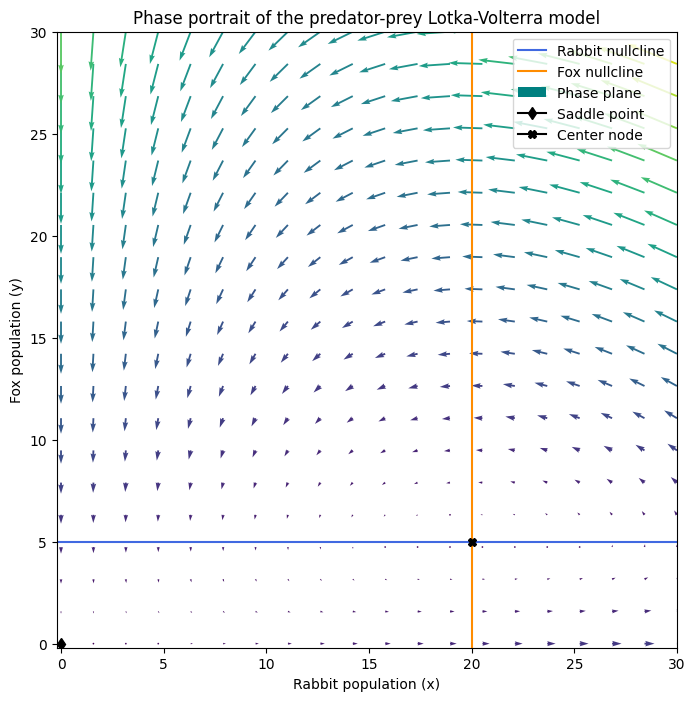

In [ ]:
# plot the phase portrait
fig, ax = plt.subplots(figsize=(8,8))

# plot the rabbit nullcline
ax.axhline(5, color="royalblue", label="Rabbit nullcline")
# plot the fox nullcline
ax.axvline(20, color="darkorange", label="Fox nullcline")
# plot the phase plane
ax.quiver(x_vals_2, y_vals_2, x_dir_2, y_dir_2, np.sqrt(x_dir_2**2 + y_dir_2**2), color="teal", label="Phase plane")
# plot fixed points
ax.plot(0, 0, color="black", marker="d", label="Saddle point")
ax.plot(20, 5, color="black", marker="X", label="Center node")

ax.legend(loc="upper right")
ax.set(title="Phase portrait of the predator-prey Lotka-Volterra model",
       xlabel="Rabbit population (x)", ylabel="Fox population (y)",
       xlim=[-0.2,30], ylim=[-0.2,30])

plt.show()

Pick 1 exemplary starting value (for example ($x = 10, y = 10$)) and simulate the trajectory. Plot it in phase space and also the solutions for $x$ and $y$ as functions of time.

In [ ]:
def sim_prey_lotka_volterra(time_span, x_start, y_start):
  """
  This function describes the simulation of rabbit and fox populations according to the predator-prey Lotka-Volterra model.

  Parameters:
  time_span -- denotes the length of the simulation
  x_start -- denotes the initial value of x
  y_start -- denotes the initial value of y

  Returns:
  statemon -- a StateMonitor object tracking the behaviour of x(t) and y(t)
  """
  start_scope()

  # set model parameters
  alpha = 0.1
  beta = 0.02
  gamma = 0.4
  delta = 0.02

  # define the differential equations for the predator-prey Lotka-Volterra model
  eqs = """
  dx/dt = 1/ms * (alpha*x - beta*x*y) : 1
  dy/dt = 1/ms * (delta*x*y - gamma*y) : 1
  """

  # create a NeuronGroup with respective starting values
  neuron = NeuronGroup(1, model=eqs, method="euler")
  neuron.x = x_start
  neuron.y = y_start

  # set up a StateMonitor to track the trajectories of x(t) and y(t)
  statemon = StateMonitor(neuron, ["x", "y"], record=True)

  # create a Network object to manage the simulation
  net = Network(neuron, statemon)
  # run a simulation for given duration
  net.run(time_span)

  return statemon

In [ ]:
# set duration of simulation
duration_2 = 1*second
# starting values for x and y
x_init, y_init = (10, 10)
# run the model simulation
statemon = sim_prey_lotka_volterra(duration_2, x_init, y_init)

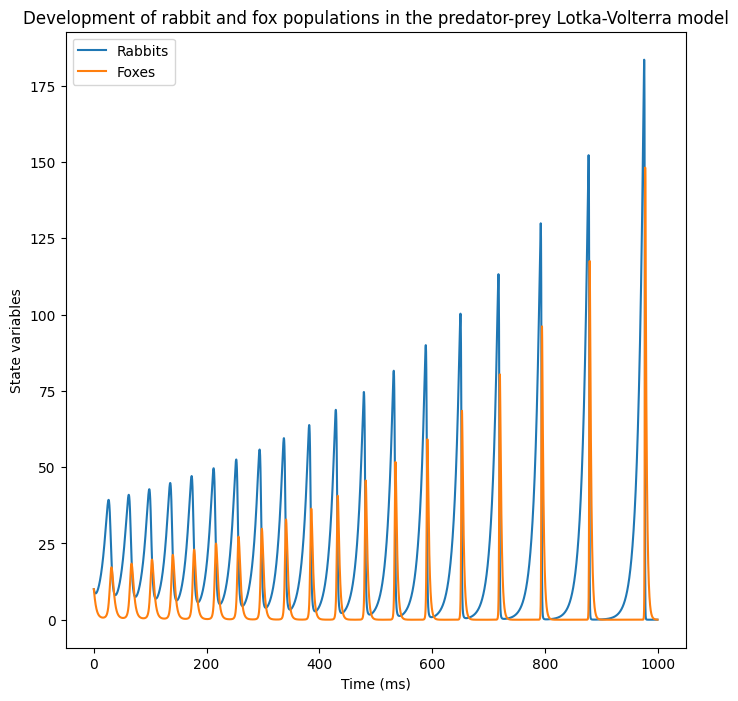

In [ ]:
# plot rabbit and fox populations as a function of time
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(statemon.t/ms, statemon.x[0], label="Rabbits")
ax.plot(statemon.t/ms, statemon.y[0], label="Foxes")
ax.set(xlabel="Time (ms)", ylabel="State variables", title="Development of rabbit and fox populations in the predator-prey Lotka-Volterra model")
ax.legend(loc="upper left")

plt.show()

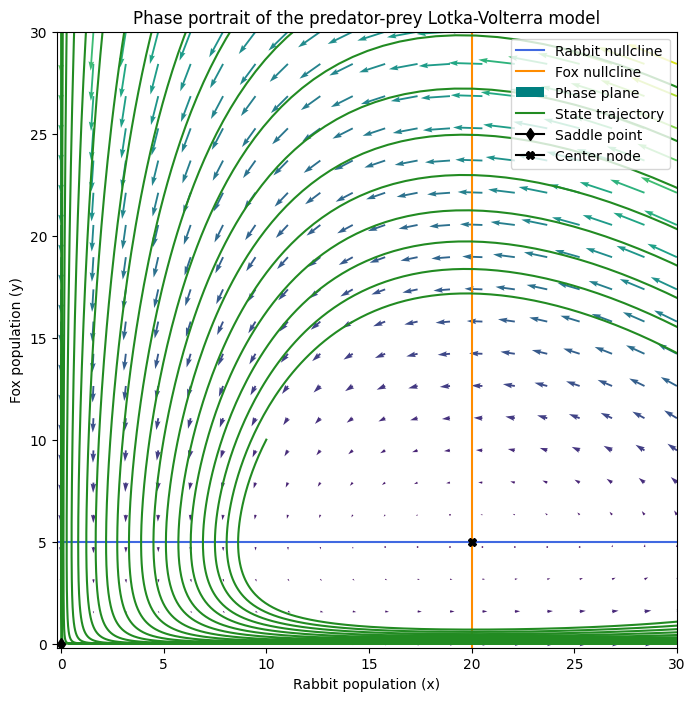

In [ ]:
# plot the phase portrait
fig, ax = plt.subplots(figsize=(8,8))

# plot the rabbit nullcline
ax.axhline(5, color="royalblue", label="Rabbit nullcline")
# plot the fox nullcline
ax.axvline(20, color="darkorange", label="Fox nullcline")
# plot the phase plane
ax.quiver(x_vals_2, y_vals_2, x_dir_2, y_dir_2, np.sqrt(x_dir_2**2 + y_dir_2**2), color="teal", label="Phase plane")
# add trajectory of x(t) and y(t)
ax.plot(statemon.x[0], statemon.y[0], color="forestgreen", label="State trajectory")
# plot fixed points
ax.plot(0, 0, color="black", marker="d", label="Saddle point")
ax.plot(20, 5, color="black", marker="X", label="Center node")

ax.legend(loc="upper right")
ax.set(title="Phase portrait of the predator-prey Lotka-Volterra model",
       xlabel="Rabbit population (x)", ylabel="Fox population (y)",
       xlim=[-0.2,30], ylim=[-0.2,30])

plt.show()

As we can see, the system exhibits rotating orbits around the center node at $(20,5)$ when $x,y > 0$. Given the latter condition, there is no possibility of either population going extinct. If we were to start with a state like $(10,0)$, meaning there were no foxes, then the rabbit population would diverge along the $x$-axis. In contrast, the fox population would converge to $(0,0)$ if there were no rabbits at the start of the simulation.

The rotating orbits in the phase portrait indicate that the predator population can only grow as long as there is a certain amount of prey available. So once the rabbit population declines under a certain threshold, the fox population decreases while the rabbit population can recover. Likewise, the frequency of rabbit deaths will increase once their population goes above a certain threshold.